## **Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

## **Loading dataset**

In [4]:
"""first column belongs to sensor_1 and the second column belongs to sensor_2
Here, we use the measurement of sensor_1
"""
df = pd.read_csv("../input/vibration-dataset-for-bolt-loosening-detection/Case1/Case1_1000.csv")
df.head()

,1.020901,-7.182708
0,0.757071,-8.904066
1,0.990800,-3.074634
2,-0.684258,-3.170634
3,1.386250,-7.072217
4,-1.878283,-5.865274


In [5]:
signal = df.iloc[:, -2].values
signal.shape

(419999,)

## **Data Visualization**

Text(0.5, 1.0, 'Row vibration signal')

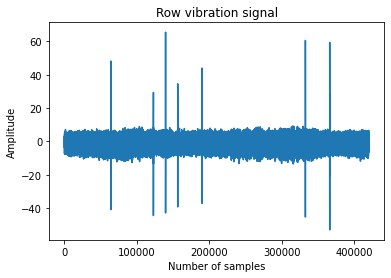

In [6]:
plt.plot(signal)
plt.xlabel("Number of samples")
plt.ylabel("Amplitude")
plt.title("Row vibration signal")

## **Frequency domain feature extruction methods**

### Mathematical expressions

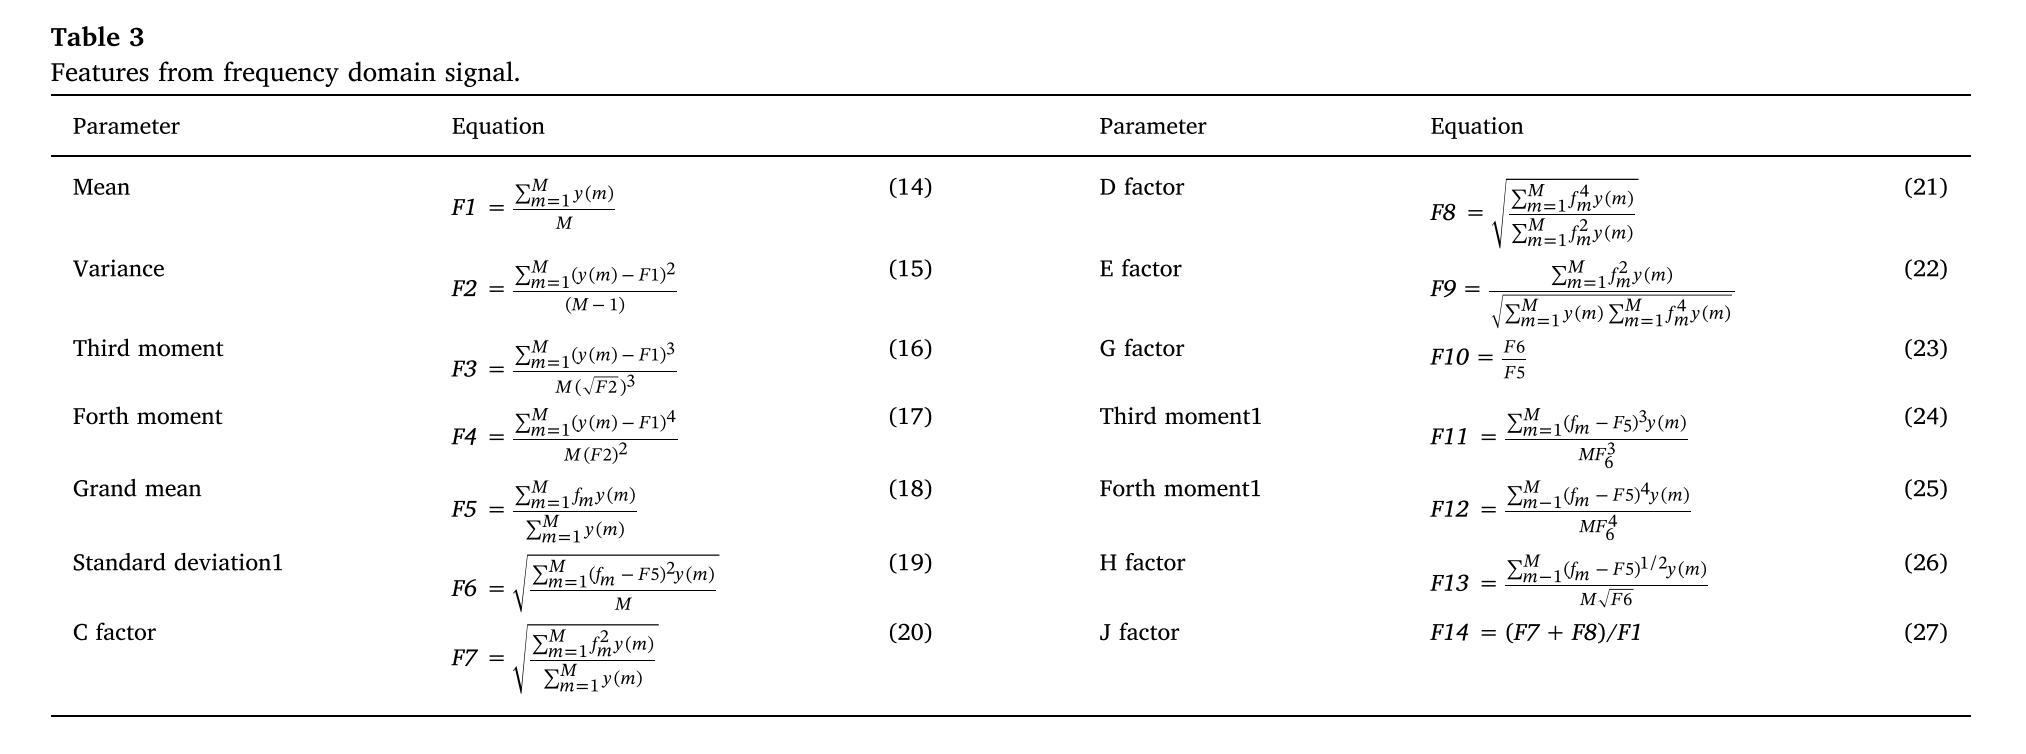

In [43]:
def get_mean_freq(signal, frame_size, hop_length):
    mean = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        current_mean = np.sum(y)/frame_size
        mean.append(current_mean)
    return np.array(mean)

def get_variance_freq(signal, frame_size, hop_length):
    var = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        current_var = (np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1)
        var.append(current_var)
    return np.array(var)

def get_third_freq(signal, frame_size, hop_length):
    third = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        current_third = (np.sum((y - (np.sum(y)/frame_size))**3))/(frame_size * (np.sqrt((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1)))**3)
        third.append(current_third)
    return np.array(third)

def get_forth_freq(signal, frame_size, hop_length):
    forth = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        current_forth = (np.sum((y - (np.sum(y)/frame_size))**4))/(frame_size * ((np.sum((y - (np.sum(y)/frame_size))**2))/(frame_size-1))**2)
        forth.append(current_forth)
    return np.array(forth)

def get_grand_freq(signal, frame_size, hop_length):
    grand = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_grand = np.sum(f * y)/np.sum(y)
        grand.append(current_grand)
    return np.array(grand)

def get_std_freq(signal, frame_size, hop_length):
    std = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_std = np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size)
        std.append(current_std)
    return np.array(std)

def get_Cfactor_freq(signal, frame_size, hop_length):
    cfactor = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_cfactor = np.sqrt(np.sum(f**2 * y)/np.sum(y))
        cfactor.append(current_cfactor)
    return np.array(cfactor)

def get_Dfactor_freq(signal, frame_size, hop_length):
    dfactor = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_dfactor = np.sqrt(np.sum(f**4 * y)/np.sum(f**2 * y))
        dfactor.append(current_dfactor)
    return np.array(dfactor)

def get_Efactor_freq(signal, frame_size, hop_length):
    efactor = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_efactor = np.sqrt(np.sum(f**2 * y)/np.sqrt(np.sum(y) * np.sum(f**4 * y)))
        efactor.append(current_efactor)
    return np.array(efactor)

def get_Gfactor_freq(signal, frame_size, hop_length):
    gfactor = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_gfactor = (np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size))/(np.sum(f * y)/np.sum(y))
        gfactor.append(current_gfactor)
    return np.array(gfactor)

def get_third1_freq(signal, frame_size, hop_length):
    third1 = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_third1 = np.sum((f - (np.sum(f * y)/np.sum(y)))**3 * y)/(frame_size * (np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size))**3)
        third1.append(current_third1)
    return np.array(third1)

def get_forth1_freq(signal, frame_size, hop_length):
    forth1 = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_forth1 = np.sum((f - (np.sum(f * y)/np.sum(y)))**4 * y)/(frame_size * (np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size))**4)
        forth1.append(current_forth1)
    return np.array(forth1)

def get_Hfactor_freq(signal, frame_size, hop_length):
    hfactor = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_hfactor = np.sum(np.sqrt(abs(f - (np.sum(f * y)/np.sum(y)))) * y)/(frame_size * np.sqrt(np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size)))
        hfactor.append(current_hfactor)
    return np.array(hfactor)

def get_Jfactor_freq(signal, frame_size, hop_length):
    jfactor = []
    for i in range(0, len(signal), hop_length):
        L = len(signal[i:i+frame_size])
        y = abs(np.fft.fft(signal[i:i+frame_size]/L))[:int(L/2)]
        f = np.fft.fftfreq (L,.1/25600)[:int(L/2)] 
        current_jfactor = np.sum(np.sqrt(abs(f - (np.sum(f * y)/np.sum(y)))) * y)/(frame_size * np.sqrt(np.sqrt(np.sum((f-(np.sum(f * y)/np.sum(y)))**2 * y)/frame_size)))
        jfactor.append(current_jfactor)
    return np.array(jfactor)

In [44]:
list_features_function = [get_mean_freq, get_variance_freq, get_third_freq, get_forth_freq, get_grand_freq,
                         get_std_freq, get_Cfactor_freq, get_Dfactor_freq, get_Efactor_freq, get_Gfactor_freq,
                         get_third1_freq, get_forth1_freq, get_Hfactor_freq, get_Jfactor_freq]

print('Number of feature extruction methods: ', len(list_features_function))

Number of feature extruction methods:  14


In [45]:
def get_all_fetures(X, frame_size, hop_length):
    stationary_features = []
    for func in list_features_function:
        f = func(signal, frame_size, hop_length)
        stationary_features.append(f)
    return stationary_features

In [46]:
features = get_all_fetures(signal, frame_size=1024, hop_length=512)
np.array(features).T.shape

(821, 14)

## **Preparing dataset for ML**

In [47]:
ready_data=pd.DataFrame({'Mean': np.array(features).T[:, 0],
                         'Variance': np.array(features).T[:, 1],
                         'Third moment': np.array(features).T[:, 2],
                         'Forth moment': np.array(features).T[:, 3],
                         'Grand mean': np.array(features).T[:, 4],
                         'STD': np.array(features).T[:, 5],
                         'C factor': np.array(features).T[:, 6],
                         'D factor': np.array(features).T[:, 7],
                         'E factor': np.array(features).T[:, 8],
                         'G factor': np.array(features).T[:, 9],
                         'Third moment_1': np.array(features).T[:, 10],
                         'Forth moment_1': np.array(features).T[:, 11],
                         'H factor': np.array(features).T[:, 12],
                         'J factor': np.array(features).T[:, 13]
                        })


# ready_data.to_csv('submission.csv', index=False)

In [48]:
ready_data.head()

,Mean,Variance,Third moment,Forth moment,Grand mean,STD,C factor,D factor,E factor,G factor,Third moment_1,Forth moment_1,H factor,J factor
0,0.018946,0.002498,9.934485,145.706811,41715.400382,5707.129058,58816.423234,102760.017838,0.756549,0.136811,5.612229,113.630799,0.044475,0.044475
1,0.020159,0.002748,9.014587,104.251652,41866.530145,5764.254379,58318.053590,101416.033455,0.758312,0.137682,5.417964,108.717375,0.046279,0.046279
2,0.019892,0.002653,8.723904,101.252113,39407.214761,5691.582328,56403.951881,101202.973764,0.746549,0.144430,6.038547,117.087602,0.045404,0.045404
3,0.018493,0.002808,10.058208,135.684660,40189.183628,5720.301776,58176.984929,103771.212059,0.748751,0.142334,6.024996,118.956705,0.043435,0.043435
4,0.018923,0.002395,8.638085,102.814940,41274.795135,5839.631874,59208.712219,104072.947620,0.754265,0.141482,5.659738,110.897858,0.044766,0.044766


## **Data Analysis**

In [49]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mean            821 non-null    float64
 1   Variance        821 non-null    float64
 2   Third moment    821 non-null    float64
 3   Forth moment    821 non-null    float64
 4   Grand mean      821 non-null    float64
 5   STD             821 non-null    float64
 6   C factor        821 non-null    float64
 7   D factor        821 non-null    float64
 8   E factor        821 non-null    float64
 9   G factor        821 non-null    float64
 10  Third moment_1  821 non-null    float64
 11  Forth moment_1  821 non-null    float64
 12  H factor        821 non-null    float64
 13  J factor        821 non-null    float64
dtypes: float64(14)
memory usage: 89.9 KB


<AxesSubplot:>

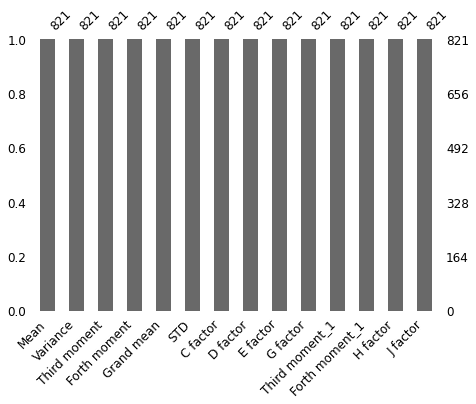

In [50]:
import missingno as mso

plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(ready_data,ax=ax_train,fontsize = 12)

## **Thanks! Keep going!**